[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%207/Leçon_7_Demo_lap.ipynb)

# ELE8812 - Segmentation

## Démo :  Détection de contours par laplacien

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.ndimage import gaussian_laplace
import math

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,10)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

## Détection de contour par méthode Laplacien (Marr-Hildreth)

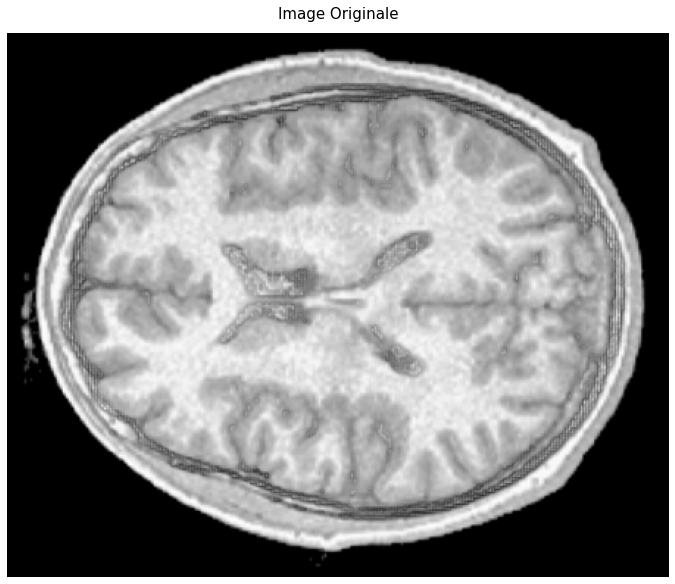

In [21]:
# Charger image
A = plt.imread('Repo/Data/cerveau.tif');
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

In [22]:
def marr_hildreth(img, sigma=1, thr=0.1):
    """Détection de contours avec la méthode Marr-Hildreth
    
    img (ndarray): Image d'entrée.
    sigma (float): Écart-type de la gaussienne.
    thr (float): Seuil de détection de contours (valeur attendue entre 0 et 1).
    """
    # Application de LoG
    log = gaussian_laplace(img, sigma=sigma)
    
    edges_log = np.zeros(log.shape)
    edges_thr = np.zeros(log.shape)
    
    # Trouver les passage par zero
    edges_log[np.where(np.diff(np.sign(log), axis=0))] = 1
    edges_log[np.where(np.diff(np.sign(log), axis=1))] = 1
    
    # Trouver les différences de gradient les plus importantes
    norm_thr = np.diff(log).max() * thr
    edges_thr[np.where(np.diff(log, axis=0) > norm_thr)] = 1
    edges_thr[np.where(np.diff(log, axis=1) > norm_thr)] = 1
    
    return edges_log * edges_thr

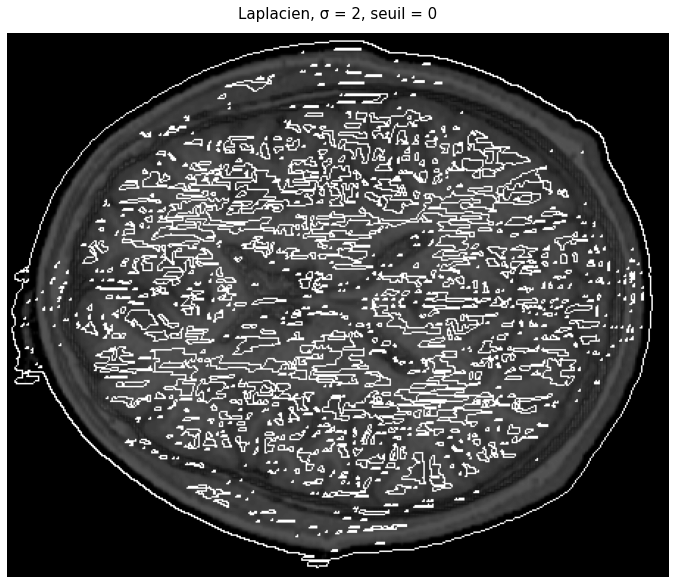

In [23]:
# Find edges using Laplacian of Gaussian "LoG"
# contours = binary image with 1s where there is an edge and 0s elsewhere
# sigma = standard deviation of Gaussian
# seuil = treshold
seuil = 0
sigma = 2

contours = marr_hildreth(A, sigma=sigma, thr=seuil)

fac = 3
iml = np.minimum(np.double(A)/(256*fac-1) + contours, 1)

plt.imshow(iml, cmap='gray'); plt.title('Laplacien, \u03C3 = '+str(sigma)+', seuil = 0'); plt.axis('off'); plt.show();

## Effet du sigma

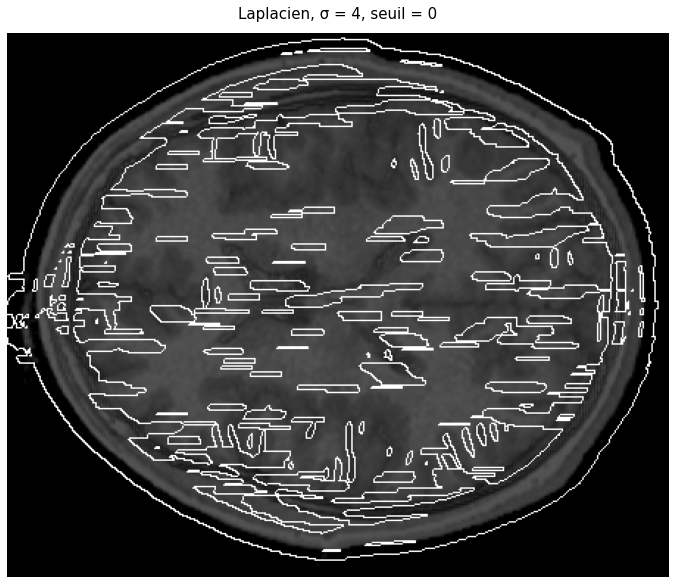

In [24]:
# greater smoothing of the original image leads to less detailed edges

seuil = 0
sigma = 4

contours = marr_hildreth(A, sigma=sigma, thr=seuil)

fac = 3
iml = np.minimum(np.double(A)/(256*fac-1) + contours, 1)

plt.imshow(iml, cmap='gray'); plt.title('Laplacien, \u03C3 = '+str(sigma)+', seuil = 0'); plt.axis('off'); plt.show();

## Effet du seuil

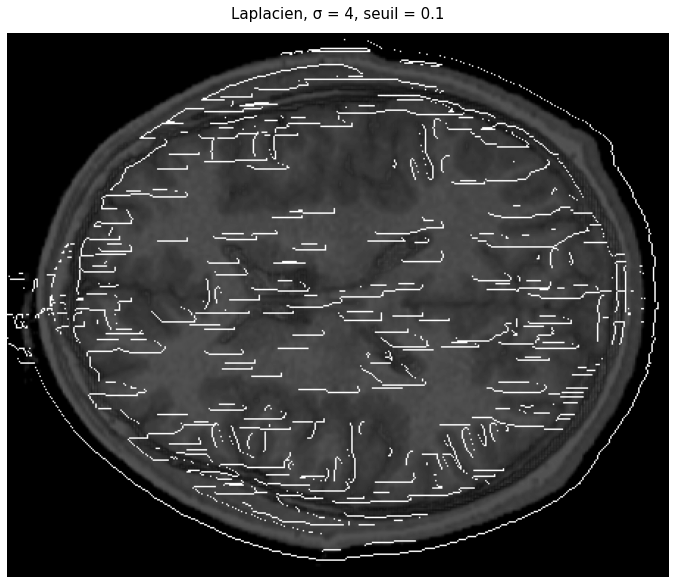

In [25]:
seuil = 0.1
sigma = 4

contours = marr_hildreth(A, sigma=sigma, thr=seuil)

fac = 3
iml = np.minimum(np.double(A)/(256*fac-1) + contours, 1)

plt.imshow(iml, cmap='gray'); plt.title('Laplacien, \u03C3 = '+str(sigma)+', seuil = 0.1'); plt.axis('off'); plt.show();